In [1]:

import sys

sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from app.database import Database

In [2]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [3]:
db = Database()
col_1 = db.create_db_connection("yearly_api_8")
yr_data = col_1.find()
yr_data_dict = dict()

i = 1
for data in yr_data:
    yr_data_dict[i] = {k: v for k, v in data.items() if k != '_id'}
    i += 1

In [4]:
cpi_lt = []
share_lt = []
gdp_lt = []


year = ['2017', '2018', '2019', '2020', '2021']
cntries = []

for k, v in yr_data_dict.items():
    if v['country'] not in cntries:
        cntries.append(v['country'])

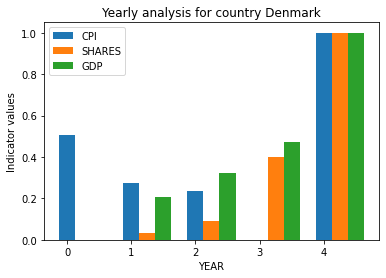

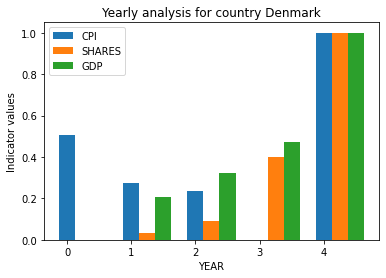

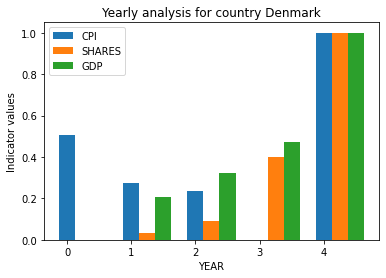

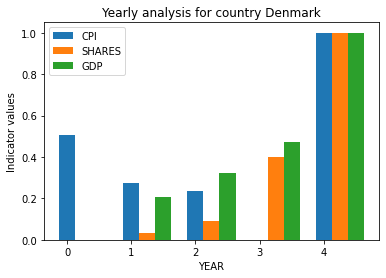

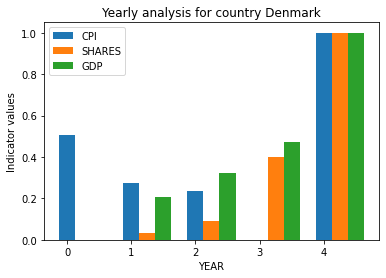

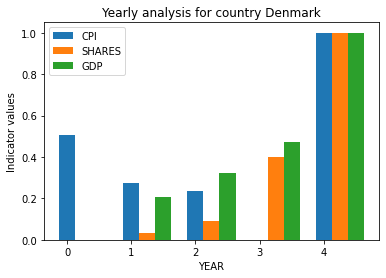

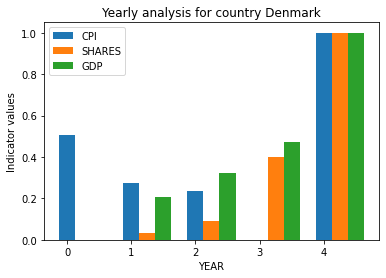

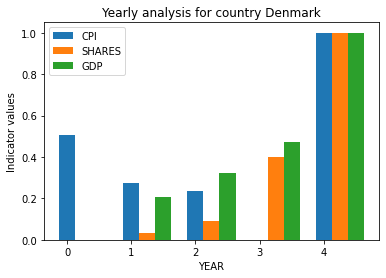

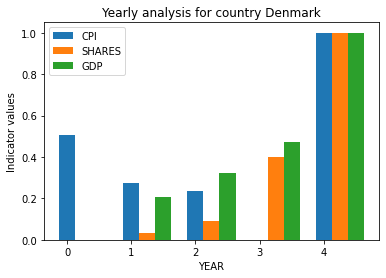

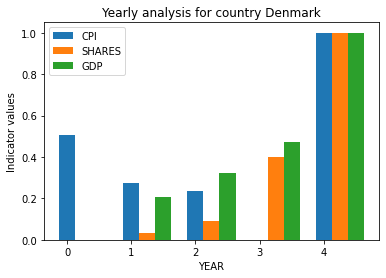

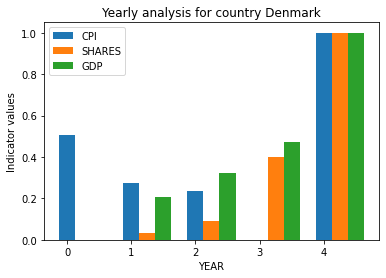

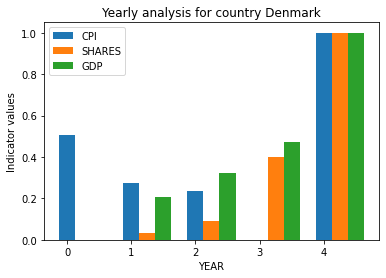

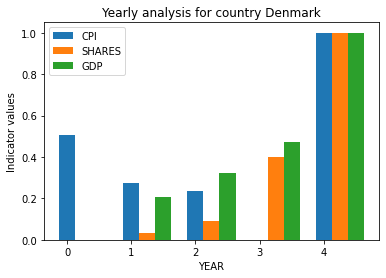

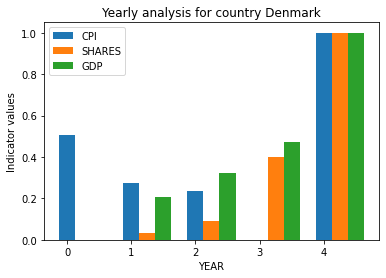

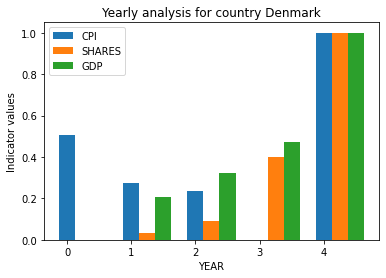

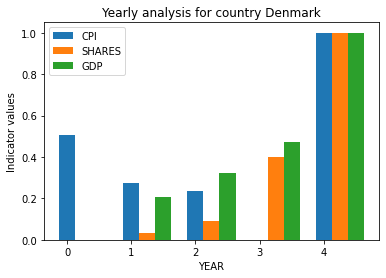

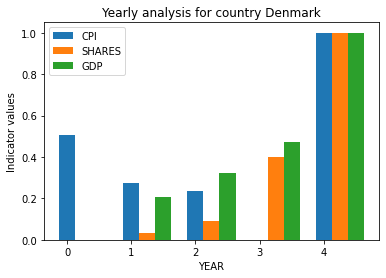

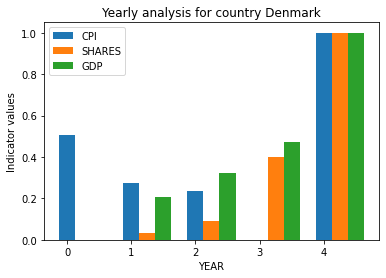

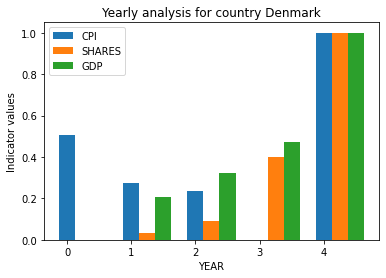

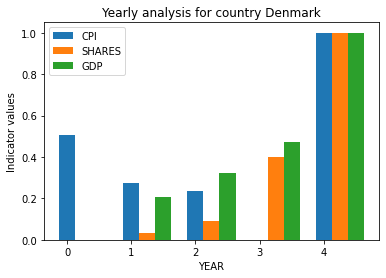

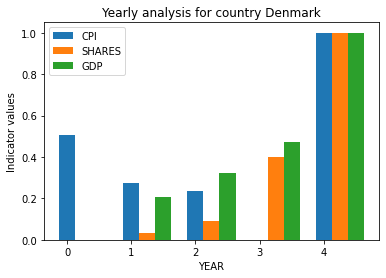

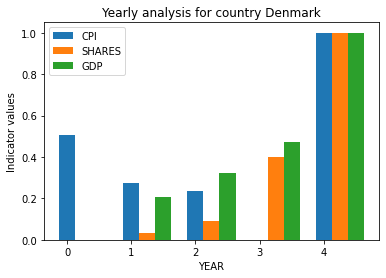

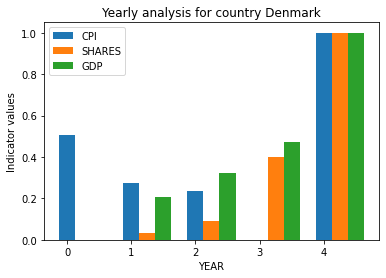

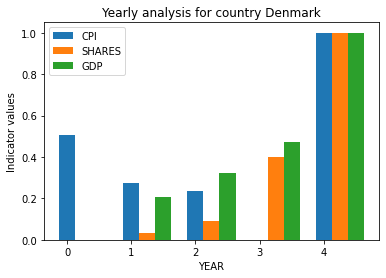

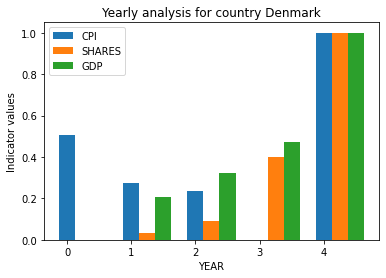

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (10,).

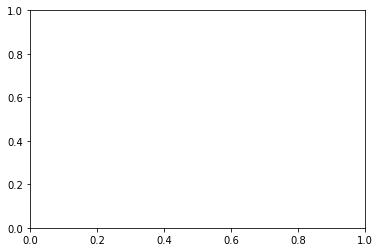

In [6]:
i = 5
for k, v in yr_data_dict.items():
    if v['country'] == cntries[i]:
        cpi_lt.append(v['cpi'])
        share_lt.append(v['share'])
        gdp_lt.append(v['gdp'])
    elif len(cpi_lt) != 0:
        cpi_lt = normalize(np.array(cpi_lt), 0, 1)
        share_lt = normalize(np.array(share_lt), 0, 1)
        gdp_lt = normalize(np.array(gdp_lt), 0, 1)
        x_axis = np.arange(len(year))
        plt.bar(x_axis, cpi_lt, 0.25, label="CPI")
        plt.bar(x_axis+0.25, share_lt, 0.25, label="SHARES")
        plt.bar(x_axis+0.50, gdp_lt, 0.25, label="GDP")
        plt.xlabel('YEAR')
        plt.ylabel('Indicator values')
        plt.title('Yearly analysis for country '+str(cntries[i]))
        plt.legend()
        plt.show()
        # plt.savefig('yr_analysis'+str(cntries[i]))
        # break